# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']

results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

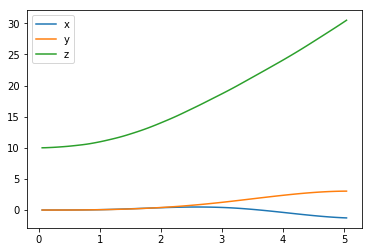

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

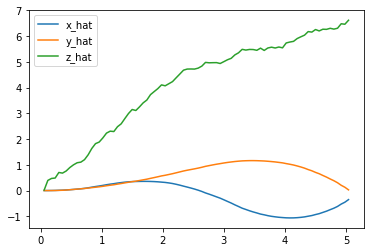

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

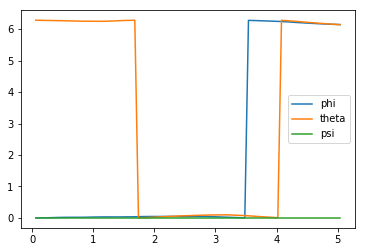

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

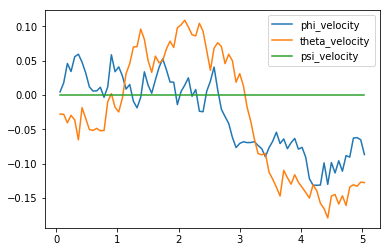

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

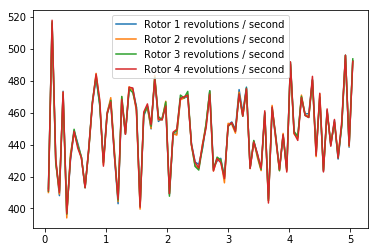

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-1.26689371  3.03579397 30.4930713   6.14566444  6.14117042  0.        ]
[-0.35121203  0.02699704  6.61592431]
[-0.08656428 -0.12738843  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [11]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done) #counter for reward
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [12]:
# source and some ideas taken from https://github.com/Fluzzroz/MLND-Quadcopter/blob/master/Quadcopter_Project.ipynb

In [13]:
## TODO: Train your agent here.
import sys, shutil, csv
import numpy as np
from agents.agent import Actor, Critic, DDPG
from task import Task

num_episodes = 200

# setup of the task for the agent
runtime = 5. # max time limit of the episode
init_pose = np.array([0.0, 0.0, 10.0, 0.0, 0.0, 0.0]) # contains these variable x,y,z,phi,theta,psi 
init_velocities = np.array([0.0, 0.0, 0.0])                
init_angle_velocities = np.array([0.0, 0.0, 0.0])          
target_pos = 10                                            

#text files for writing values                          
current_sim_filename = "current_sim.txt"                   
best_sim_filename = "best_sim.txt"



task = Task(init_pose=init_pose, init_velocities=init_velocities, 
        init_angle_velocities=init_angle_velocities, runtime=runtime, target_pos=target_pos)

agent = DDPG(task) # initialize my agent with the task specified before

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity']


best_reward = -np.inf
rewards = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    total_reward = 0

    with open(current_sim_filename, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(labels)
        while True:
            #running the simulation
            action = agent.act(state)
            action_allrotors = 4*action 
            next_state, reward, done = task.step(action_allrotors)
            agent.step(action, reward, next_state, done)
            state = next_state       
            total_reward += reward

            #taken from code cell 2 of this notebook
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v)
            writer.writerow(to_write)
            
            if done:
                    
                #output results
                rewards.append(total_reward)
                print("\rEpisode = {:d}, total_reward = {:1.2f}, (best reward = {:1.2f})".format(
                    i_episode, total_reward, best_reward), end="", flush=False)       
                
                #check new best sim
                if total_reward > best_reward:
                    best_reward = total_reward
                    # copy values to best-sim file
                    best = shutil.copyfile(current_sim_filename, best_sim_filename)
                
                break

# write rewards into file for later chart
with open("rewards.txt", "w") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(rewards)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Episode = 1, total_reward = 61.76, (best reward = -inf)WARNING:tensorflow:From /home/stephan/anaconda3/envs/quadcop/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Episode = 200, total_reward = -25.12, (best reward = 242.20)

In [14]:
# source and some ideas taken from https://github.com/Fluzzroz/MLND-Quadcopter/blob/master/Quadcopter_Project.ipynb

In [15]:
## TODO: Plot info for the best simulation run
import pandas as pd
import matplotlib.pyplot as plt
best_sim = pd.read_csv(best_sim_filename)

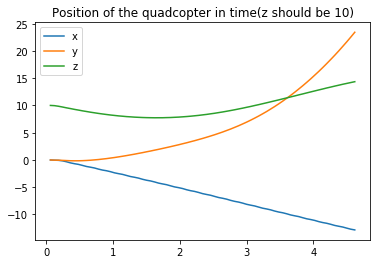

In [16]:
plt.plot(best_sim['time'], best_sim['x'], label='x')
plt.plot(best_sim['time'], best_sim['y'], label='y')
plt.plot(best_sim['time'], best_sim['z'], label='z')
plt.title("Position of the quadcopter in time(z should be 10)")
plt.legend()

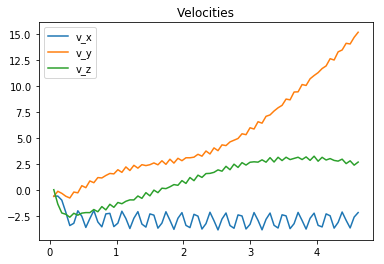

In [17]:
plt.plot(best_sim['time'], best_sim['x_velocity'], label='v_x')
plt.plot(best_sim['time'], best_sim['y_velocity'], label='v_y')
plt.plot(best_sim['time'], best_sim['z_velocity'], label='v_z')
plt.title("Velocities")
plt.legend()

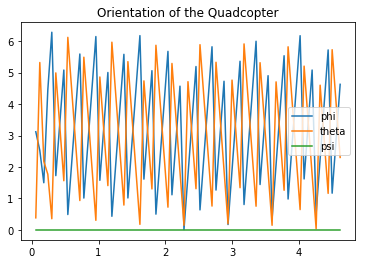

In [18]:
plt.plot(best_sim['time'], best_sim['phi'], label='phi')
plt.plot(best_sim['time'], best_sim['theta'], label='theta')
plt.plot(best_sim['time'], best_sim['psi'], label='psi')
plt.title("Orientation of the Quadcopter")
plt.legend()

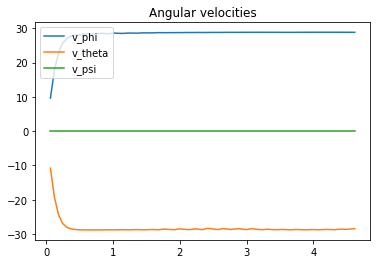

In [19]:
plt.plot(best_sim['time'], best_sim['phi_velocity'], label='v_phi')
plt.plot(best_sim['time'], best_sim['theta_velocity'], label='v_theta')
plt.plot(best_sim['time'], best_sim['psi_velocity'], label='v_psi')
plt.title("Angular velocities")
plt.legend()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [20]:
# source and some plot ideas taken from https://github.com/Fluzzroz/MLND-Quadcopter/blob/master/Quadcopter_Project.ipynb

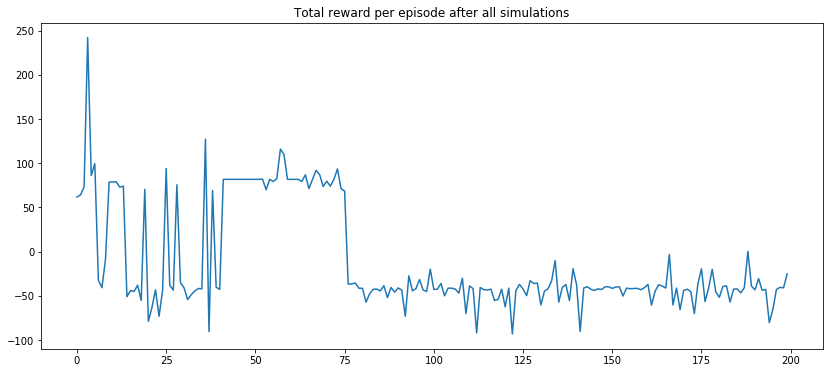

In [21]:
##TODO: plot the rewards

import pandas as pd
import matplotlib.pyplot as plt

rewards_txt = pd.read_csv("rewards.txt", header=None)
rewards_txt = rewards_txt.T
plt.figure(figsize=(14, 6))
plt.plot(rewards_txt[:])
plt.title("Total reward per episode after all simulations")
plt.savefig('rewards_final.png')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
<br>
My idea was to start in a certain postion given by the x,y and z coordinates and the task for the quadcopter is to stay in that position and (preferably) not move away from this position. The coordinates are [0,0,10] so to be 10 units above the ground - hovering.
<br>
I designed the reward function with a lot of trial and error. It took a quite long time to figure out a function that gives positive reward. My function that keeps the quadcopter in the starting position for almost the whole 5 seconds runtime gives reward of 1 when it stays in the position and the further it gets away from this position the more it gets penelized. the factor 0.02 was a trial and error result. If this factor is bigger, the reward will be extremely negative, normally.
<br>
In addition i focused on giving the rotors all the same speed by performing an action.



**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
<br>
I implemented a DDPG agent using the provided classes in the intro. The learning is based on DDPG which allows to learn in a continous action space. Starting with the initial settings of the hyperparameters I invested some effort in tuning them. See below for details:

Reducing the <b>buffer_size</b> resulted in shorter flying times of the quadcopter before he crashed. Thus, the results became worse and there was no need to follow up on that.
Changing the <b>batch_size</b> towards a smaller number prolonged the training, but seemed to keep the quadcopter in the air for longer in one dimension but not for all dimensions. The best episode was 4.4 seconds but there he drifted away very strongly in the y-axis at some point. Experimenting with bigger batch_sizes produced a similar picture in terms of stability in 2 dimensions but in 1 the quadcopter went completely off the track. But still it was not possible to keep it in the position for 5 seconds. Thus i decreased the batch_size to 32.

Playing with <b>gamma</b> revealed that a decrease of 0.09 lead to increadibly bad results. It was not possible for the quadcopter to keep its position at all and it drifted away totally far. The angular position also changed totally uncontrolable. Little changes in the discount rate seem to have a huge impact on the reward function of the quadcopter. By decreasing even more no better results were shown. Very confusing orientation curves revealed that the quadcopter does not learn a stable position. Thus I sticked with the initial value of 0.99.

Huge increases of <b>tau</b> lead to very bad performance of the algorithm towards negative rewards. Thus i sticked to the default value to not affect the overall performance too much.







**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

By handling the speed of the 4 speed of the 4 rotors with one variable (1 action), I thought it might become easier. Overall it was a hard task to learn also because of the continous space the agent moves in. I also saw that the angular position of the quadcopter has never been stable in the testing phase which also makes it a hard task to learn. 

In some episodes the agent seemed to learn very well but in general in very unstable way over time. By mainly testing around 200 episodes for the convergence of a learning curve I can say that the agent did not learn the task very well.

The final performance varies a lot. He can handle around 4.5 seconds in the air but starts to drift away at some point before he crashes. Thus, some more parameter tuning is relevant in order to provide a stable hovering.


The following plot of the best simulation from a trial run shows that the quadcopter performed very well in the z-axis and kept his height very well. (as desribed in the task) 
The problem here was, that the quadcopter moved away too far in the y-axis and the simulation stopped.
<img src="best_sim_pos.png">

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

To sum it up, the whole hyperparameter tuning topic for example is very complex and it's not easy to establish a good solution in an easy way. Especially for beginners in the field of Reinforcement Learning this is an extremely difficult task. It was challenging and interesting though to play around and begin to understand how the parameters affect the outcome. The hardest part was definetely to get started in this project and to understand all the functions of the quadcopter. This took some time. In addition it was also hard to be as specific as possible with a certain task to train, since one task was already enough to train and get experience with. My initial set of tasks was way larger, but after i realized the complexity, I postponed it to a later session. My goal is definetely to continue working on that subject.

It was very interesting to see the first learning curves and moves after the first training. Since I still lack some understanding of all the concepts available in RL at the moment, it is hard to evaluate the first results. But this made it also very challenging and triggered my curiosity towards more and additional readings.

Thanks for the really detailed introduction to this topic :)

Further improvement could be a better tuning of the hyperparameters and a different setup of the reward function. Since there are many functions and values of the quadcopter unused so far, thrust etc., one could consider these values and information as well in order to train the agent in a better way. This would lead to an increase in complexity but in the end better performance I assume.